 # Importing necessary libraries 





In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # Interacting with os 

from PIL import Image
from glob import glob

from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pydot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Dropout, Dense, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.applications.densenet import DenseNet121
from keras import layers

from IPython.display import display


In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 15.3 MB/s eta 0:00:00


In [ ]:
import visualkeras
from PIL import ImageFont

In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [ ]:
pip install --upgrade setuptools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.


In [ ]:
! pip install talos #for hypertuning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached talos-1.3-py3-none-any.whl (56 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 17.3 MB/s eta 0:00:00
  Using cached kerasplotlib-1.0-py3-none-any.whl (4.3 kB)
  Using cached chances-0.1.9.tar.gz (35 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 4.4 MB/s eta 0:00:00
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.1 MB/s eta 0:00:00
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41592 sha256=d4ce2de75d1bd3208ab7060c0b964a8c57e0c86f30f216fa69896255114690bc
  Stored in directory: /root/.cache/pip/wheels/c3/26/2b/8ae098b8e9dd7cc1fd0a9131c0f1efea60d710ff7906bf0ab4
  Created wheel for sklearn: filename=sk

In [ ]:
import talos as ta

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"charvibansal17","key":"419d34c7101e80c42a88ae2f3f21607f"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Mar 11 06:07 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kmader/skin-cancer-mnist-ham10000 # Downloading datasets

100% 5.19G/5.20G [01:03<00:00, 113MB/s]
100% 5.20G/5.20G [01:03<00:00, 88.2MB/s]


In [ ]:
! unzip skin-cancer-mnist-ham10000.zip #unzipping the dataset

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

# Data preprocessing

In [ ]:
#Set path and list all the elements in this directory
data_directory = "/content/"
os.listdir(data_directory)

['.config',
 'ham10000_images_part_2',
 'skin-cancer-mnist-ham10000.zip',
 'hmnist_8_8_L.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_RGB.csv',
 'gdrive',
 'HAM10000_metadata.csv',
 'kaggle.json',
 'HAM10000_images_part_1',
 'ham10000_images_part_1',
 'HAM10000_images_part_2',
 'sample_data']

In [ ]:
#Creating dataframe of csv present in directory
data = pd.read_csv(os.path.join(data_directory, 'HAM10000_metadata.csv'))
data.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization
834,HAM_0006064,ISIC_0032111,bkl,consensus,75.0,male,back
943,HAM_0000080,ISIC_0033865,bkl,consensus,70.0,male,lower extremity
4019,HAM_0002428,ISIC_0026510,nv,follow_up,70.0,female,trunk
343,HAM_0006987,ISIC_0027649,bkl,histo,85.0,female,upper extremity
3035,HAM_0003396,ISIC_0031068,nv,follow_up,45.0,male,lower extremity


In [ ]:
# Save all images in jpg form
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                    for x in glob(os.path.join(data_directory, '*', '*.jpg'))}

#Creating Dictionary for all shortforms in dx type                    
lesion_type_dict = {
    'nv': 'Melanocytic nevi (nv)',
    'mel': 'Melanoma (mel)',
    'bkl': 'Benign keratosis-like lesions (bkl)',
    'bcc': 'Basal cell carcinoma (bcc)',
    'akiec': 'Actinic keratoses (akiec)',
    'vasc': 'Vascular lesions (vasc)',
    'df': 'Dermatofibroma (df)'
}

label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}
#Reversing label_mapping dictionary
reverse_label_mapping = dict((value, key) for key, value in label_mapping.items())

In [ ]:
#Creating new column cell type and image path
data['cell_type'] = data['dx'].map(lesion_type_dict.get)
data['path'] = data['image_id'].map(imageid_path_dict.get)

In [ ]:
#New coloumn made for image pixels & resizing all images
data['image_pixel'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((28,28))))

In [ ]:
#Showing any 5 data samples
data.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path,image_pixel
3858,HAM_0000942,ISIC_0028554,nv,follow_up,75.0,female,abdomen,Melanocytic nevi (nv),/content/ham10000_images_part_1/ISIC_0028554.jpg,"[[[221, 163, 189], [224, 166, 191], [224, 165,..."
7696,HAM_0006700,ISIC_0032659,nv,histo,40.0,female,back,Melanocytic nevi (nv),/content/HAM10000_images_part_2/ISIC_0032659.jpg,"[[[116, 120, 130], [155, 161, 173], [176, 182,..."
1816,HAM_0004754,ISIC_0033198,mel,histo,65.0,male,back,Melanoma (mel),/content/HAM10000_images_part_2/ISIC_0033198.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [3, 2, 1], ..."
2768,HAM_0003135,ISIC_0028107,bcc,histo,55.0,male,chest,Basal cell carcinoma (bcc),/content/ham10000_images_part_1/ISIC_0028107.jpg,"[[[153, 95, 86], [160, 107, 98], [169, 118, 11..."
3979,HAM_0003126,ISIC_0029181,nv,follow_up,40.0,female,lower extremity,Melanocytic nevi (nv),/content/ham10000_images_part_1/ISIC_0029181.jpg,"[[[244, 159, 165], [245, 161, 167], [246, 160,..."


## Data visualisation

In [ ]:
#Making subplots for all significant parameters
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Sex', 'Localisation', 'Age', 'Skin Type'],
                    vertical_spacing=0.15,
                    column_widths=[0.4, 0.6])

fig.add_trace(go.Bar(
            x=data['sex'].value_counts().index, 
            y=data['sex'].value_counts()),
            row=1, col=1)
fig.add_trace(go.Bar(
            x=data['localization'].value_counts().index, 
            y=data['localization'].value_counts()),
            row=1, col=2)
fig.add_trace(go.Histogram(
            x=data['age']),
            row=2, col=1)
fig.add_trace(go.Bar(
            x=data['dx'].value_counts().index.map(lesion_type_dict.get), 
            y=data['dx'].value_counts()),
            row=2, col=2)

for i in range(4):
    fig.update_yaxes(title_text='Count', row=i//2+1, col=i%2+1)
fig.update_layout(title='Distribution of Data', height=800)



In [ ]:
#Details of pandas dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   cell_type     10015 non-null  object 
 8   path          10015 non-null  object 
 9   image_pixel   10015 non-null  object 
dtypes: float64(1), object(9)
memory usage: 782.5+ KB


In [ ]:
# Handling null values
data['age'].fillna(value=int(data['age'].mean()), inplace=True)
# Converting dtype of age to int32
data['age'] = data['age'].astype('int32')
data['label'] = data['dx'].map(reverse_label_mapping.get)
data.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,path,image_pixel,label
8468,HAM_0006258,ISIC_0028484,nv,histo,10,female,upper extremity,Melanocytic nevi (nv),/content/ham10000_images_part_1/ISIC_0028484.jpg,"[[[215, 178, 172], [217, 177, 169], [222, 183,...",0
4639,HAM_0002453,ISIC_0029921,nv,follow_up,30,male,abdomen,Melanocytic nevi (nv),/content/HAM10000_images_part_2/ISIC_0029921.jpg,"[[[246, 163, 175], [246, 163, 176], [246, 165,...",0
6626,HAM_0002927,ISIC_0028012,nv,follow_up,50,male,trunk,Melanocytic nevi (nv),/content/ham10000_images_part_1/ISIC_0028012.jpg,"[[[230, 160, 180], [229, 159, 180], [228, 158,...",0
5357,HAM_0006565,ISIC_0027489,nv,follow_up,80,male,trunk,Melanocytic nevi (nv),/content/ham10000_images_part_1/ISIC_0027489.jpg,"[[[223, 149, 168], [226, 151, 172], [227, 153,...",0
3188,HAM_0000789,ISIC_0028932,nv,follow_up,40,male,abdomen,Melanocytic nevi (nv),/content/ham10000_images_part_1/ISIC_0028932.jpg,"[[[225, 156, 161], [226, 157, 161], [225, 154,...",0


In [ ]:
# Sorting the types of cancer based on labels and resetting indexes to default values
data = data.sort_values('label')
data = data.reset_index()

In [ ]:
#Image augmentation
index1 = data[data['label'] == 1].index.values
index2 = data[data['label'] == 2].index.values
index3 = data[data['label'] == 3].index.values
index4 = data[data['label'] == 4].index.values
index5 = data[data['label'] == 5].index.values
index6 = data[data['label'] == 6].index.values

df_index1 = data.iloc[int(min(index1)):int(max(index1)+1)]
df_index2 = data.iloc[int(min(index2)):int(max(index2)+1)]
df_index3 = data.iloc[int(min(index3)):int(max(index3)+1)]
df_index4 = data.iloc[int(min(index4)):int(max(index4)+1)]
df_index5 = data.iloc[int(min(index5)):int(max(index5)+1)]
df_index6 = data.iloc[int(min(index6)):int(max(index6)+1)]

df_index1 = df_index1.append([df_index1]*4, ignore_index = True)
df_index2 = df_index2.append([df_index2]*4, ignore_index = True)
df_index3 = df_index3.append([df_index3]*11, ignore_index = True)
df_index4 = df_index4.append([df_index4]*17, ignore_index = True)
df_index5 = df_index5.append([df_index5]*45, ignore_index = True)
df_index6 = df_index6.append([df_index6]*52, ignore_index = True)

frames = [data, df_index1, df_index2, df_index3, df_index4, df_index5, df_index6]
final_data = pd.concat(frames)

In [ ]:
%%time
print(data.shape)
print(final_data.shape)

(10015, 12)
(45756, 12)
CPU times: user 1.65 ms, sys: 23 µs, total: 1.68 ms
Wall time: 1.69 ms


In [ ]:
#Plotting augmented data
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Sex', 'Localisation', 'Age', 'Skin Type'],
                    vertical_spacing=0.15,
                    column_widths=[0.4, 0.6])

fig.add_trace(go.Bar(
            x=final_data['sex'].value_counts().index, 
            y=final_data['sex'].value_counts()),
            row=1, col=1)
fig.add_trace(go.Bar(
            x=final_data['localization'].value_counts().index, 
            y=final_data['localization'].value_counts()),
            row=1, col=2)
fig.add_trace(go.Histogram(
            x=final_data['age']),
            row=2, col=1)
fig.add_trace(go.Bar(
            x=final_data['dx'].value_counts().index.map(lesion_type_dict.get), 
            y=final_data['dx'].value_counts()),
            row=2, col=2)

for i in range(4):
    fig.update_yaxes(title_text='Count', row=i//2+1, col=i%2+1)
fig.update_layout(title='Distribution of Data after augmentation', height=800)

fig.show()

In [ ]:
# ORIGINAL DATA
# Converting image pixel column into required format
X_orig = data['image_pixel'].to_numpy()
X_orig = np.stack(X_orig, axis=0)
Y_orig = np.array(data.iloc[:, -1:])
print(X_orig.shape)
print(Y_orig.shape)

(10015, 28, 28, 3)
(10015, 1)


In [ ]:
# AUGMENTED DATA
# Converting image pixel columnm into required format
X_aug = final_data['image_pixel'].to_numpy()
X_aug = np.stack(X_aug, axis=0)
Y_aug = np.array(final_data.iloc[:, -1:])
print(X_aug.shape)
print(Y_aug.shape)

(45756, 28, 28, 3)
(45756, 1)


# Creating Model

In [ ]:
# Function for splitting test and train
def prepare_for_train_test(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')
    train_datagen.fit(X_train)
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_datagen.fit(X_test)
    return X_train, X_test, Y_train, Y_test

#Function to create model
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
    

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                  metrics = ['accuracy'])
    print(model.summary())
    return model;

#Function to train model
def train_model(model, X_train, Y_train, EPOCHS=25):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, 
                           mode='auto', restore_best_weights=True)
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')    
    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size = 64,
                        epochs = EPOCHS,
                        callbacks = [reduce_lr, early_stop])
    return history

# Plotting curves of Accuracy and Loss  vs Epochs   
def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'], 
            name='train_acc'), 
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'], 
            name='val_acc'), 
        row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'], 
            name='train_loss'), 
        row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'], 
            name='val_loss'), 
        row=1, col=2)
    fig.show()   

#Function to get different metrics for determining the accuracy of model prediction 
def test_model(model, X_test, Y_test):
    model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]
    print("Test Accuracy: {:.3f}%".format(model_acc * 100))
    y_true = np.array(Y_test)
    y_pred = model.predict(X_test)
    y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))
    clr = classification_report(y_true, y_pred, target_names=label_mapping.values())
    print(clr)    
    sample_data = X_test[:15]
    plt.figure(figsize=(22, 12))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(sample_data[i])
        plt.title(label_mapping[y_true[i][0]] + '|' + label_mapping[y_pred[i]])
        plt.axis("off")
    plt.show() 

In [ ]:
X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = prepare_for_train_test(X_aug, Y_aug)

In [ ]:
model1 = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

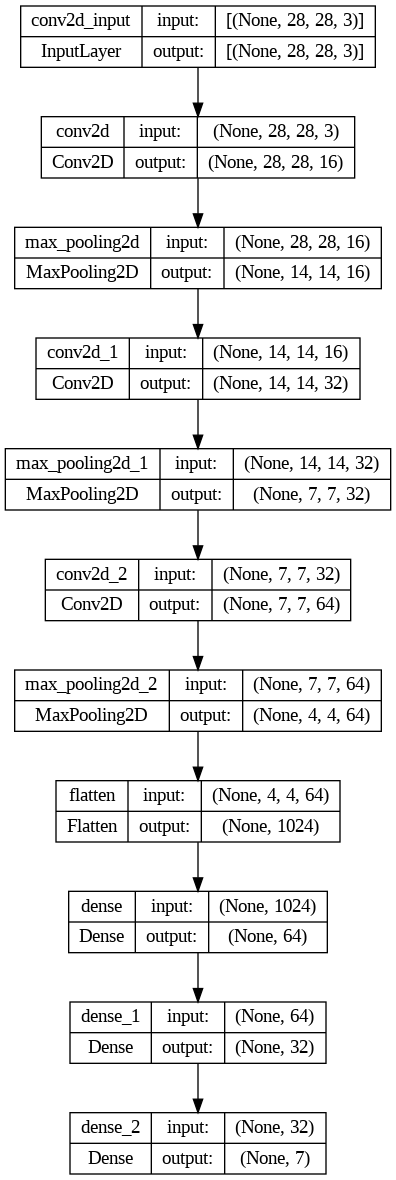

In [ ]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

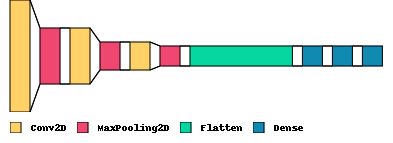

In [ ]:
visualkeras.layered_view(model1, legend=True, draw_volume=False) 

In [ ]:
hist=train_model(model1, X_train_orig, Y_train_orig)

Epoch 1/25
458/458 [==============================] - 39s 79ms/step - loss: 1.9263 - accuracy: 0.4033 - val_loss: 1.1627 - val_accuracy: 0.5647 - lr: 0.0010
Epoch 2/25
458/458 [==============================] - 34s 74ms/step - loss: 1.0500 - accuracy: 0.6037 - val_loss: 0.9682 - val_accuracy: 0.6371 - lr: 0.0010
Epoch 3/25
458/458 [==============================] - 35s 76ms/step - loss: 0.8398 - accuracy: 0.6889 - val_loss: 0.8107 - val_accuracy: 0.7043 - lr: 0.0010
Epoch 4/25
458/458 [==============================] - 35s 77ms/step - loss: 0.6969 - accuracy: 0.7390 - val_loss: 0.6152 - val_accuracy: 0.7697 - lr: 0.0010
Epoch 5/25
458/458 [==============================] - 32s 70ms/step - loss: 0.5710 - accuracy: 0.7892 - val_loss: 0.5010 - val_accuracy: 0.8156 - lr: 0.0010
Epoch 6/25
458/458 [==============================] - 35s 76ms/step - loss: 0.4706 - accuracy: 0.8260 - val_loss: 0.4361 - val_accuracy: 0.8428 - lr: 0.0010
Epoch 7/25
458/458 [==============================] - 35s 

# Accuracy and Loss Plots

In [ ]:
plot_model_training_curve(hist)

# Testing the Model

Test Accuracy: 97.247%
286/286 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

          nv       0.98      0.84      0.91      1385
         mel       0.93      0.99      0.96      1328
         bkl       0.93      0.98      0.96      1294
         bcc       0.98      1.00      0.99      1325
       akiec       1.00      1.00      1.00      1270
        vasc       1.00      1.00      1.00      1293
          df       1.00      1.00      1.00      1257

    accuracy                           0.97      9152
   macro avg       0.97      0.97      0.97      9152
weighted avg       0.97      0.97      0.97      9152



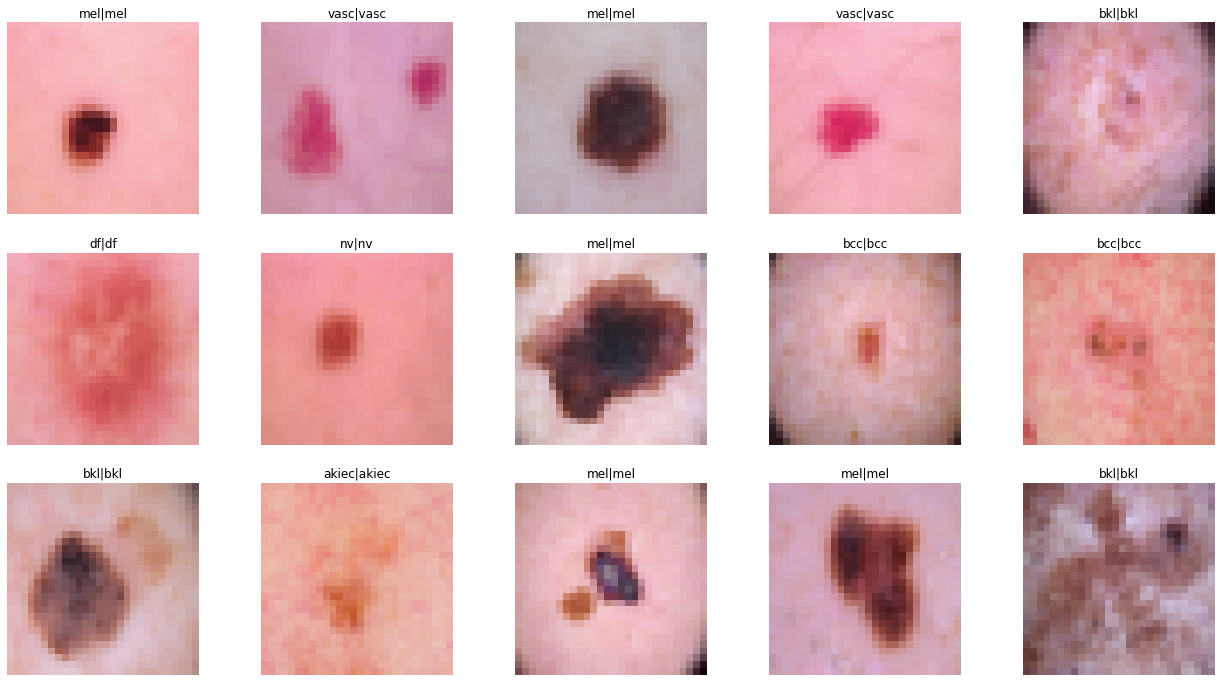

In [ ]:
test_model(model1,X_test_orig, Y_test_orig)

# Hyperparameter Tuning

In [ ]:
#Function for hyperparameter tuning(Finding out the best combinations for improved accuracy)
def model_hypertuning(X_train, Y_train, X_test, Y_test, param):
  dense1_neuron = int(param['dense1_neuron'])
  learning_rate = float(param['learning_rate'])
  model = Sequential()
  model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
  model.add(MaxPool2D(pool_size = (2,2)))

  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
  model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

  model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
  model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
    

  model.add(Flatten())
  model.add(Dense(dense1_neuron, activation = 'relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(7, activation='softmax'))

  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])
  early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, 
                           mode='auto', restore_best_weights=True)
    
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='auto')    
  history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size = 64,
                        epochs = 25,
                        callbacks = [reduce_lr, early_stop])
  return history, model

In [ ]:
#parameters
param ={
    'dense1_neuron': [64, 128, 256],
    'activation': ['relu', 'elu'],
    'learning_rate':[0.001, 0.01]
}

In [ ]:
scan_results = ta.Scan(X_train_orig,Y_train_orig, params=param, model=model_hypertuning,experiment_name="Model_test")

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1/25
321/321 [==============================] - 44s 126ms/step - loss: 1.6048 - accuracy: 0.4580 - val_loss: 1.0591 - val_accuracy: 0.6078 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 28s 87ms/step - loss: 0.9073 - accuracy: 0.6573 - val_loss: 0.7993 - val_accuracy: 0.6935 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 22s 70ms/step - loss: 0.6773 - accuracy: 0.7449 - val_loss: 0.6281 - val_accuracy: 0.7582 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 28s 86ms/step - loss: 0.5251 - accuracy: 0.8029 - val_loss: 0.5328 - val_accuracy: 0.8031 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 27s 83ms/step - loss: 0.4301 - accuracy: 0.8420 - val_loss: 0.4004 - val_accuracy: 0.8517 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 23s 71ms/step - loss: 0.3546 - accuracy: 0.8699 - val_loss: 0.3577 - val_accuracy: 0.8697 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 24s

  8%|▊         | 1/12 [11:26<2:05:50, 686.42s/it]

Epoch 1/25
321/321 [==============================] - 26s 76ms/step - loss: 1.8740 - accuracy: 0.4095 - val_loss: 1.2330 - val_accuracy: 0.5218 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 24s 73ms/step - loss: 1.0814 - accuracy: 0.5855 - val_loss: 0.9898 - val_accuracy: 0.6168 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 25s 79ms/step - loss: 0.8802 - accuracy: 0.6747 - val_loss: 0.7992 - val_accuracy: 0.6980 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 24s 76ms/step - loss: 0.7335 - accuracy: 0.7271 - val_loss: 0.6813 - val_accuracy: 0.7454 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 25s 78ms/step - loss: 0.5998 - accuracy: 0.7756 - val_loss: 0.5793 - val_accuracy: 0.7799 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 25s 79ms/step - loss: 0.5194 - accuracy: 0.8092 - val_loss: 0.5087 - val_accuracy: 0.8144 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 24s 

 17%|█▋        | 2/12 [21:50<1:48:16, 649.64s/it]

Epoch 1/25
321/321 [==============================] - 24s 71ms/step - loss: 1.6183 - accuracy: 0.4500 - val_loss: 1.0351 - val_accuracy: 0.5830 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 28s 86ms/step - loss: 0.9131 - accuracy: 0.6502 - val_loss: 0.8124 - val_accuracy: 0.6991 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 24s 74ms/step - loss: 0.7021 - accuracy: 0.7418 - val_loss: 0.7425 - val_accuracy: 0.7087 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 24s 76ms/step - loss: 0.5658 - accuracy: 0.7918 - val_loss: 0.4921 - val_accuracy: 0.8154 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 24s 74ms/step - loss: 0.4330 - accuracy: 0.8447 - val_loss: 0.4836 - val_accuracy: 0.8263 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 25s 78ms/step - loss: 0.3649 - accuracy: 0.8676 - val_loss: 0.4161 - val_accuracy: 0.8503 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 24s 

 25%|██▌       | 3/12 [32:14<1:35:41, 637.89s/it]

Epoch 1/25
321/321 [==============================] - 28s 82ms/step - loss: 1.8544 - accuracy: 0.4257 - val_loss: 1.1571 - val_accuracy: 0.5660 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 23s 71ms/step - loss: 1.0366 - accuracy: 0.6059 - val_loss: 0.9218 - val_accuracy: 0.6535 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 25s 79ms/step - loss: 0.8424 - accuracy: 0.6786 - val_loss: 0.8011 - val_accuracy: 0.7122 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 24s 75ms/step - loss: 0.6917 - accuracy: 0.7385 - val_loss: 0.6677 - val_accuracy: 0.7510 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 24s 75ms/step - loss: 0.5991 - accuracy: 0.7753 - val_loss: 0.6641 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 26s 80ms/step - loss: 0.5255 - accuracy: 0.8040 - val_loss: 0.5284 - val_accuracy: 0.7965 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 24s 

 33%|███▎      | 4/12 [43:38<1:27:29, 656.20s/it]

Epoch 1/25
321/321 [==============================] - 30s 88ms/step - loss: 2.4475 - accuracy: 0.4086 - val_loss: 1.2172 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 23s 72ms/step - loss: 1.0810 - accuracy: 0.5909 - val_loss: 1.0383 - val_accuracy: 0.5838 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 27s 83ms/step - loss: 0.8731 - accuracy: 0.6758 - val_loss: 0.8199 - val_accuracy: 0.6952 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 26s 81ms/step - loss: 0.7270 - accuracy: 0.7376 - val_loss: 0.7039 - val_accuracy: 0.7526 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 24s 76ms/step - loss: 0.6047 - accuracy: 0.7799 - val_loss: 0.6022 - val_accuracy: 0.7885 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 26s 81ms/step - loss: 0.5100 - accuracy: 0.8166 - val_loss: 0.5577 - val_accuracy: 0.7986 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 24s 

 42%|████▏     | 5/12 [54:07<1:15:25, 646.54s/it]

Epoch 1/25
321/321 [==============================] - 27s 80ms/step - loss: 1.7837 - accuracy: 0.4078 - val_loss: 1.2141 - val_accuracy: 0.5218 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 26s 80ms/step - loss: 1.0363 - accuracy: 0.6102 - val_loss: 0.9130 - val_accuracy: 0.6591 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 25s 79ms/step - loss: 0.7867 - accuracy: 0.7066 - val_loss: 0.7448 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 23s 71ms/step - loss: 0.6145 - accuracy: 0.7710 - val_loss: 0.5820 - val_accuracy: 0.7840 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 28s 86ms/step - loss: 0.4703 - accuracy: 0.8306 - val_loss: 0.4594 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 23s 71ms/step - loss: 0.3874 - accuracy: 0.8616 - val_loss: 0.3890 - val_accuracy: 0.8628 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 27s 

 50%|█████     | 6/12 [1:05:31<1:05:55, 659.26s/it]

Epoch 1/25
321/321 [==============================] - 25s 72ms/step - loss: 2.0634 - accuracy: 0.3405 - val_loss: 1.4407 - val_accuracy: 0.4328 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 27s 83ms/step - loss: 1.1820 - accuracy: 0.5445 - val_loss: 1.0162 - val_accuracy: 0.6197 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 23s 71ms/step - loss: 0.9758 - accuracy: 0.6288 - val_loss: 0.8930 - val_accuracy: 0.6808 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 26s 81ms/step - loss: 0.7883 - accuracy: 0.7076 - val_loss: 0.8004 - val_accuracy: 0.7165 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 26s 80ms/step - loss: 0.6632 - accuracy: 0.7556 - val_loss: 0.6663 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 24s 76ms/step - loss: 0.5482 - accuracy: 0.8013 - val_loss: 0.5750 - val_accuracy: 0.7848 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 26s 

 58%|█████▊    | 7/12 [1:15:56<53:59, 647.93s/it]  

Epoch 1/25
321/321 [==============================] - 28s 84ms/step - loss: 1.9015 - accuracy: 0.4241 - val_loss: 1.0591 - val_accuracy: 0.5971 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 25s 76ms/step - loss: 0.9859 - accuracy: 0.6228 - val_loss: 0.9057 - val_accuracy: 0.6398 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 24s 73ms/step - loss: 0.7751 - accuracy: 0.7050 - val_loss: 0.6692 - val_accuracy: 0.7495 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 25s 78ms/step - loss: 0.6114 - accuracy: 0.7693 - val_loss: 0.5519 - val_accuracy: 0.8002 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 22s 68ms/step - loss: 0.5007 - accuracy: 0.8148 - val_loss: 0.4596 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 28s 88ms/step - loss: 0.3960 - accuracy: 0.8581 - val_loss: 0.3797 - val_accuracy: 0.8691 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 25s 

 67%|██████▋   | 8/12 [1:26:21<42:42, 640.66s/it]

Epoch 1/25
321/321 [==============================] - 31s 92ms/step - loss: 2.6839 - accuracy: 0.4242 - val_loss: 1.3049 - val_accuracy: 0.4825 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 29s 89ms/step - loss: 0.9748 - accuracy: 0.6334 - val_loss: 0.8330 - val_accuracy: 0.6931 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 23s 72ms/step - loss: 0.7419 - accuracy: 0.7247 - val_loss: 0.6281 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 30s 92ms/step - loss: 0.5917 - accuracy: 0.7785 - val_loss: 0.5511 - val_accuracy: 0.7924 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 24s 73ms/step - loss: 0.4666 - accuracy: 0.8285 - val_loss: 0.4428 - val_accuracy: 0.8343 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 28s 86ms/step - loss: 0.3724 - accuracy: 0.8645 - val_loss: 0.3703 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 27s 

 75%|███████▌  | 9/12 [1:37:45<32:42, 654.25s/it]

Epoch 1/25
321/321 [==============================] - 25s 70ms/step - loss: 2.1422 - accuracy: 0.1486 - val_loss: 1.9036 - val_accuracy: 0.2203 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 23s 71ms/step - loss: 1.5997 - accuracy: 0.3501 - val_loss: 1.3015 - val_accuracy: 0.4501 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 25s 79ms/step - loss: 1.1725 - accuracy: 0.5229 - val_loss: 1.1069 - val_accuracy: 0.5456 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 25s 79ms/step - loss: 0.9335 - accuracy: 0.6351 - val_loss: 0.8338 - val_accuracy: 0.6821 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 23s 71ms/step - loss: 0.7040 - accuracy: 0.7325 - val_loss: 0.6236 - val_accuracy: 0.7620 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 26s 80ms/step - loss: 0.5336 - accuracy: 0.8020 - val_loss: 0.5164 - val_accuracy: 0.8023 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 21s 

 83%|████████▎ | 10/12 [1:48:10<21:30, 645.17s/it]

Epoch 1/25
321/321 [==============================] - 24s 72ms/step - loss: 2.5348 - accuracy: 0.1416 - val_loss: 1.9454 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 27s 85ms/step - loss: 1.9454 - accuracy: 0.1421 - val_loss: 1.9451 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 25s 78ms/step - loss: 1.9453 - accuracy: 0.1461 - val_loss: 1.9450 - val_accuracy: 0.1518 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 22s 69ms/step - loss: 1.9453 - accuracy: 0.1454 - val_loss: 1.9449 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 27s 84ms/step - loss: 1.9453 - accuracy: 0.1416 - val_loss: 1.9449 - val_accuracy: 0.1518 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 21s 67ms/step - loss: 1.9453 - accuracy: 0.1455 - val_loss: 1.9450 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 26s 

 92%|█████████▏| 11/12 [1:53:54<09:13, 553.03s/it]

Epoch 1/25
321/321 [==============================] - 25s 74ms/step - loss: 2.1250 - accuracy: 0.1459 - val_loss: 1.9453 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 2/25
321/321 [==============================] - 25s 79ms/step - loss: 1.9454 - accuracy: 0.1471 - val_loss: 1.9451 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 3/25
321/321 [==============================] - 25s 78ms/step - loss: 1.9453 - accuracy: 0.1426 - val_loss: 1.9450 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 4/25
321/321 [==============================] - 25s 77ms/step - loss: 1.9453 - accuracy: 0.1416 - val_loss: 1.9450 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 5/25
321/321 [==============================] - 25s 79ms/step - loss: 1.9453 - accuracy: 0.1425 - val_loss: 1.9450 - val_accuracy: 0.1518 - lr: 0.0010
Epoch 6/25
321/321 [==============================] - 23s 70ms/step - loss: 1.9453 - accuracy: 0.1428 - val_loss: 1.9450 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 7/25
321/321 [==============================] - 26s 

100%|██████████| 12/12 [2:01:18<00:00, 606.55s/it]


In [ ]:
densenet = DenseNet121(
    weights='/content/DenseNet-BC-121-32-no-top.h5',
    include_top=False,
    input_shape=(28,28,3)
)

ValueError: ignored

In [ ]:
def build_model():
    model = Sequential()
    model.add(densenet)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(5, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(lr=0.00005),
        metrics=['accuracy']
    )
    
    return model

In [ ]:
model2=build_model()
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 7,042,629
Trainable params: 6,958,981
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
hist1=train_model(model2, X_train_orig, Y_train_orig)

Epoch 1/25


ValueError: ignored

In [ ]:
plot_model_training_curve(hist1)

In [ ]:
test_model(model2,X_test_orig, Y_test_orig)